# День 03 – Предиктивный анализ II

Дерево классификации, случайный лес, XGBoost, логрегрессия. 

Дополнительные метрики качества: precision, recall, F1, ROC_AUC. 

Кросс-валидация.

## 0. Импорт библиотек

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
sns.set_style("darkgrid") #у графиков будет красивая серая подложка

## 1. Загрузка данных

Загрузить датасет bank_data_train_d02.csv – со стандартизированными признаками и one-hot-encoding.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/School21/day03/bank_data_train_d02.csv', index_col='ID')

In [ ]:
df.head(2)

In [ ]:
df.shape

## 2. Формирование выборок: обучающая, тестовая

**Разбить датасет** на train и test 

с параметрами: test_size=0.2, random_state=21

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('TARGET', axis=1), df.TARGET, #разделим на признаки и целевой признак
                                                    test_size=0.2, 
                                                    random_state=21)

In [ ]:
print('Признаки обучающей выборки:',X_train.shape, y_train.shape,
      'Тестовая выборка', X_test.shape, y_test.shape)

## 3. Исследование

**Кросс-валидиция**

с параметрами cv=5 и метрикой качества ROC-AUC 

Обучить модели с **random_state=21**:
- логрегрессия
- дерево классификации
- случайный лес
- XGBoost

Для каждой из моделей сделать как минимум **3 итерации**, пробуя разные гиперпараметры, пытаясь найти ту комбинацию, которая дает максимальное значение метрики на кросс-валидации.

3.1 Обучение моделей

In [ ]:
#импорт библиотек четырех моделей

#Логистическая регрессия
from sklearn.linear_model import LogisticRegression

#Дерево классификации
from sklearn.tree import DecisionTreeClassifier

#Случайный лес 
from sklearn.ensemble import RandomForestClassifier

#XGBoost

#from xgboost import XGBClassifier

from xgboost.sklearn import XGBClassifier

In [ ]:
# библиотека для кросс-валидации

from sklearn.model_selection import cross_val_score

**Логистическая регрессия**

**1 итерация** с гиперпараметрами solver='liblinear', fit_intercept=False, random_state=21

In [ ]:
clf1 = LogisticRegression(solver='liblinear', fit_intercept=False, random_state=21)
LgR_1 = cross_val_score(clf1, X_train, y_train, cv=5, scoring = 'roc_auc')
#print("Логистическая регрессия, ROC-AUC_1:", LgR_1.mean())

**2 итерация** с гиперпараметрами solver='liblinear', fit_intercept=False, penalty='l1', random_state=21

In [ ]:
clf2 = LogisticRegression(solver='liblinear', fit_intercept=False, penalty='l1', random_state=21)
LgR_2 = cross_val_score(clf2, X_train, y_train, cv=5, scoring = 'roc_auc')
#print("Логистическая регрессия, ROC-AUC_2:", LgR_2.mean())

**3 итерация** с гиперпараметрами solver='newton-cg', fit_intercept=False, penalty='l2', random_state=21

In [ ]:
clf3 = LogisticRegression(solver='newton-cg', fit_intercept=False, penalty='l2', random_state=21)
LgR_3 = cross_val_score(clf3, X_train, y_train, cv=5, scoring = 'roc_auc')
#print("Логистическая регрессия, ROC-AUC_2:", LgR_3.mean())

**Дерево классификации**

1 итерация с гиперпараметрами max_depth=2, random_state=21

In [ ]:
d_clf1 = DecisionTreeClassifier(max_depth=2, random_state=21)
Dtc_1 = cross_val_score(d_clf1, X_train, y_train, cv=5, scoring = 'roc_auc')
#print("Дерево классификации, ROC-AUC_1:", Dtc_1.mean())

2 итерация с гиперпараметрами splitter='best', max_depth=2, random_state=21

In [ ]:
d_clf2 = DecisionTreeClassifier(splitter='best', max_depth=3, random_state=21)
Dtc_2 = cross_val_score(d_clf2, X_train, y_train, cv=5, scoring = 'roc_auc')
#print("Дерево классификации, ROC-AUC_2:", Dtc_2.mean())

3 итерация с гиперпараметрами splitter = 'random', max_depth=3, random_state=21)

In [ ]:
d_clf3 = DecisionTreeClassifier(splitter = 'random', max_depth=3, random_state=21)
Dtc_3 = cross_val_score(d_clf3, X_train, y_train, cv=5, scoring = 'roc_auc')
#print("Дерево классификации, ROC-AUC_3:", Dtc_3.mean())

**Случайный лес**

1 итерация с гиперпараметрами random_state=21, n_estimators = 100)

In [ ]:
f_clf1 = RandomForestClassifier(random_state=21, n_estimators = 100)
Rfc_1 = cross_val_score(f_clf1, X_train, y_train, cv=5, scoring = 'roc_auc')
#print("Случайный лес, ROC-AUC_1:", Rfc_1.mean())

2 итерация с гиперпараметрами random_state=21, max_features = 'log2'

In [ ]:
f_clf2 = RandomForestClassifier(random_state=21, max_features = 'log2')
Rfc_2 = cross_val_score(f_clf2, X_train, y_train, cv=5, scoring = 'roc_auc')
#print("Случайный лес, ROC-AUC_2:", Rfc_2.mean())

3 итерация с гиперпараметрами random_state=21, n_estimators = 10, max_features = 'log2'

In [ ]:
f_clf3 = RandomForestClassifier(random_state=21, n_estimators = 10, max_features = 'log2')
Rfc_3 = cross_val_score(f_clf3, X_train, y_train, cv=5, scoring = 'roc_auc')
#print("Случайный лес, ROC-AUC_3:", Rfc_3.mean())

**XGBoost**

1 итерация с гиперпараметрами random_state=21, n_estimators=10, max_depth=5, objective= 'binary:logistic'


In [ ]:
x_clf1 = XGBClassifier(random_state=21, n_estimators=10, max_depth=5, objective= 'binary:logistic')
Xgb_1 = cross_val_score(x_clf1, X_train, y_train, cv=5, scoring = 'roc_auc')
#print("XGBoost, ROC-AUC_1:", Xgb_1.mean())

2 итерация с гиперпараметрами random_state=21, n_estimators=100, max_depth=5, objective= 'binary:logistic'

In [ ]:
x_clf2 = XGBClassifier(random_state=21, n_estimators=100, max_depth=5, objective= 'binary:logistic')
Xgb_2 = cross_val_score(x_clf2, X_train, y_train, cv=5, scoring = 'roc_auc')
#print("XGBoost, ROC-AUC_2:", Xgb_2.mean())

3 итерация с гиперпараметрами random_state=21, n_estimators=140, max_depth=5, objective= 'binary:logistic'

In [ ]:
x_clf3 = XGBClassifier(random_state=21, n_estimators=140, max_depth=5, objective= 'binary:logistic')
Xgb_3 = cross_val_score(x_clf3, X_train, y_train, cv=5, scoring = 'roc_auc')
#print("XGBoost, ROC-AUC_3:", Xgb_3.mean())

In [42]:
print("Логистическая регрессия, ROC-AUC_1:", LgR_1.mean())
print("Логистическая регрессия, ROC-AUC_2:", LgR_2.mean())
print("Логистическая регрессия, ROC-AUC_3:", LgR_3.mean())

print("Дерево классификации, ROC-AUC_1:", Dtc_1.mean())
print("Дерево классификации, ROC-AUC_2:", Dtc_2.mean())
print("Дерево классификации, ROC-AUC_3:", Dtc_3.mean())

print("Случайный лес, ROC-AUC_1:", Rfc_1.mean())
print("Случайный лес, ROC-AUC_2:", Rfc_2.mean())
print("Случайный лес, ROC-AUC_3:", Rfc_3.mean())

print("XGBoost, ROC-AUC_1:", Xgb_1.mean())
print("XGBoost, ROC-AUC_2:", Xgb_2.mean())
print("XGBoost, ROC-AUC_3:", Xgb_3.mean())

Логистическая регрессия, ROC-AUC_1: 0.745585542008787
Логистическая регрессия, ROC-AUC_2: 0.7456829258148101
Логистическая регрессия, ROC-AUC_3: 0.7455934924494304
Дерево классификации, ROC-AUC_1: 0.7051058480723981
Дерево классификации, ROC-AUC_2: 0.7501257564644227
Дерево классификации, ROC-AUC_3: 0.6331189966005129
Случайный лес, ROC-AUC_1: 0.8149233258961273
Случайный лес, ROC-AUC_2: 0.7963723695542178
Случайный лес, ROC-AUC_3: 0.699874317477261
XGBoost, ROC-AUC_1: 0.8075008522102947
XGBoost, ROC-AUC_2: 0.8412148006486996
XGBoost, ROC-AUC_3: 0.8441800980787468


Выбрать из четырех алгоритмов, два с параметрами, обеспечивающими максимальное качество на кросс-валидации (п.5 задания) 

Для них:

ещё раз отдельно обучить на тренировочной выборке;

посчитать ROC-AUC на тестовой выборке;

построить график с топ-10 самыми важными признаками.

 Как видно выше два алгоритм, обеспечивающий максимальное качество на кросс-валидации это:

1. **Случайный лес** с гиперпараметрами random_state=21, n_estimators = 100)

2. **XGBoost** с гиперпараметрами random_state=21, n_estimators=140, max_depth=5, objective= 'binary:logistic'

In [ ]:
f_clf_test = RandomForestClassifier(random_state=21, n_estimators = 100).fit(X_train, y_train)
Rfc_test = cross_val_score(f_clf_test, X_test, y_test, cv=5, scoring = 'roc_auc')
print("Случайный лес, ROC-AUC на тестовой выборке:", Rfc_test.mean())

Случайный лес, ROC-AUC на тестовой выборке: 0.8040402777478519


In [ ]:
x_clf_test = XGBClassifier(random_state=21, n_estimators=140, max_depth=5, objective= 'binary:logistic').fit(X_train, y_train)
Xgb_test = cross_val_score(x_clf_test, X_test, y_test, cv=5, scoring = 'roc_auc')
print("XGBoost, ROC-AUC на тестовый выборке:", Xgb_test.mean())

XGBoost, ROC-AUC на тестовый выборке: 0.8416561291359409


*Построим график с топ-10 самыми важными признаками*

In [29]:
def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)
    plt.figure(figsize=(12,5))
    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.show()

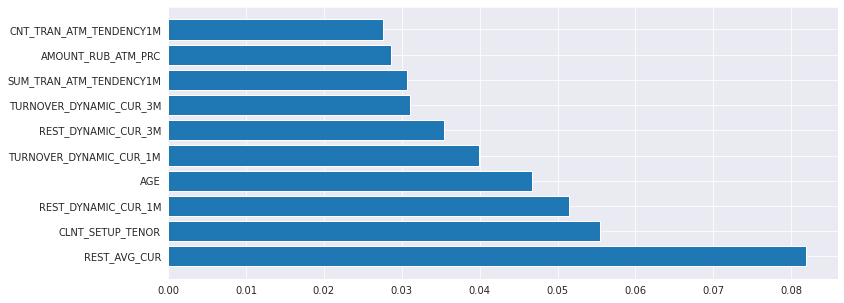

In [30]:
f_importances(abs(f_clf_test.feature_importances_), X_train.columns, top=10)

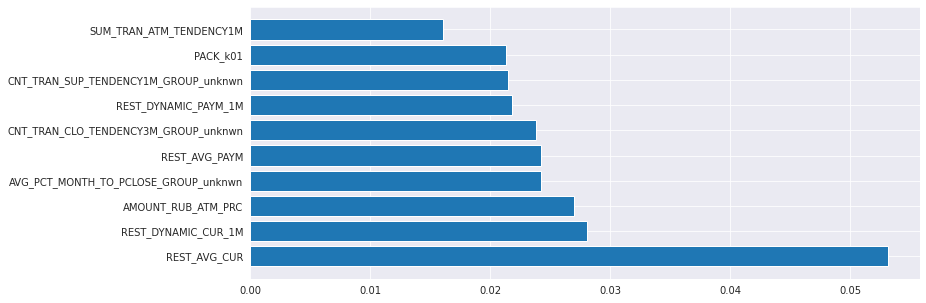

In [31]:
f_importances(abs(x_clf_test.feature_importances_), X_train.columns, top=10)

Сохранить обе модели на диск (п.6 задаания)

In [32]:
import pickle

In [46]:
RFC_best = 'best_model_RFC.sav'
pickle.dump(f_clf_test, open(RFC_best, 'wb'))

In [47]:
XGB_best = 'best_model.sav'
pickle.dump(x_clf_test, open(XGB_best, 'wb'))

Загрузить сохранённые модели и снова проверить ROC-AUC на тестовой выборке: они должны показывать те же значения.

In [39]:
loaded_RFC = pickle.load(open(RFC_best, 'rb'))
best_RFC = loaded_RFC.fit(X_train, y_train)
best_RАС_test = cross_val_score(best_RFC, X_test, y_test, cv=5, scoring = 'roc_auc')
print("Случайный лес, ROC-AUC на тестовой выборке (загрузка сохраненной модели):", best_RАС_test.mean())
print("Случайный лес, ROC-AUC на тестовой выборке:", Rfc_test.mean())

Случайный лес, ROC-AUC на тестовой выборке (загрузка сохраненной модели): 0.8040402777478519
Случайный лес, ROC-AUC на тестовой выборке: 0.8040402777478519


In [40]:
loaded_XGB = pickle.load(open(XGB_best, 'rb'))
best_XGB = loaded_XGB.fit(X_train, y_train)
best_XGB_test = cross_val_score(best_XGB, X_test, y_test, cv=5, scoring = 'roc_auc')
print("XGBoost, ROC-AUC на тестовый выборке (загрузка сохраненной модели):", best_XGB_test.mean())
print("XGBoost, ROC-AUC на тестовый выборке:", Xgb_test.mean())

XGBoost, ROC-AUC на тестовый выборке (загрузка сохраненной модели): 0.8416561291359409
XGBoost, ROC-AUC на тестовый выборке: 0.8416561291359409
